In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read data
df = pd.read_csv('data.csv')
#Droping id column
df = df.drop('customer_id', axis=1)

In [3]:
#raw data before cleaning
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,NaN,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,NaN,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,France,NaN,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,France,Female,NaN,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,Spain,Female,43.0,NaN,125510.82,1.0,1.0,1.0,79084.10,0.0


In [4]:
#DETECT AND HANDLE MISSING VALUES AND DULICATES
print(df.isnull().sum())
print("Duplication: " , df.duplicated().sum())

credit_score        4
country             5
gender              4
age                 2
tenure              1
balance             2
products_number     3
credit_card         2
active_member       6
estimated_salary    2
churn               1
dtype: int64
Duplication:  0


In [5]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,9996.000000,9998.000000,9999.000000,9998.000000,9997.000000,9998.000000,9994.000000,9998.000000,9999.000000
mean,650.530212,38.922484,5.013101,76475.203654,1.530059,0.705541,0.515109,100083.676787,0.203720
std,96.661512,10.488627,2.892162,62398.653521,0.581685,0.455822,0.499797,57508.530141,0.402784
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
#cleaning data
#using mean
credit_mean_value = df['credit_score'].mean()
age_mean_value = df['age'].mean()
tenure_mean_value = df['tenure'].mean()
balance_mean_value = df['balance'].mean()
productnum_mean_value = df['products_number'].mean()
estimate_salary_mean_value = df['estimated_salary'].mean()
creditcard_mean_value = df['credit_card'].mean()
activemember_mean_value = df['active_member'].mean()



df['credit_score'] = df['credit_score'].fillna(credit_mean_value)
df['age'] = df['age'].fillna(age_mean_value)
df['tenure'] = df['tenure'].fillna(tenure_mean_value)
df['balance'] = df['balance'].fillna(balance_mean_value)
df['products_number'] = df['products_number'].fillna(productnum_mean_value)
df['estimated_salary'] = df['estimated_salary'].fillna(estimate_salary_mean_value)
df['credit_card'] = df['credit_card'].fillna(credit_mean_value)
df['active_member'] = df['active_member'].fillna(activemember_mean_value)

#using mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Remove rows where 'churn' is missing
df = df.dropna(subset=['churn'])
df.isnull().sum()






credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9999 non-null   float64
 1   country           9999 non-null   object 
 2   gender            9999 non-null   object 
 3   age               9999 non-null   float64
 4   tenure            9999 non-null   float64
 5   balance           9999 non-null   float64
 6   products_number   9999 non-null   float64
 7   credit_card       9999 non-null   float64
 8   active_member     9999 non-null   float64
 9   estimated_salary  9999 non-null   float64
 10  churn             9999 non-null   float64
dtypes: float64(9), object(2)
memory usage: 937.4+ KB


C:\Users\Surface Laptop 3\AppData\Local\Temp\ipykernel_8032\2215007219.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette=['#66b3ff','#ff9999'], ax=ax[1])
C:\Users\Surface Laptop 3\AppData\Local\Temp\ipykernel_8032\2215007219.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Retained', 'Churned'])


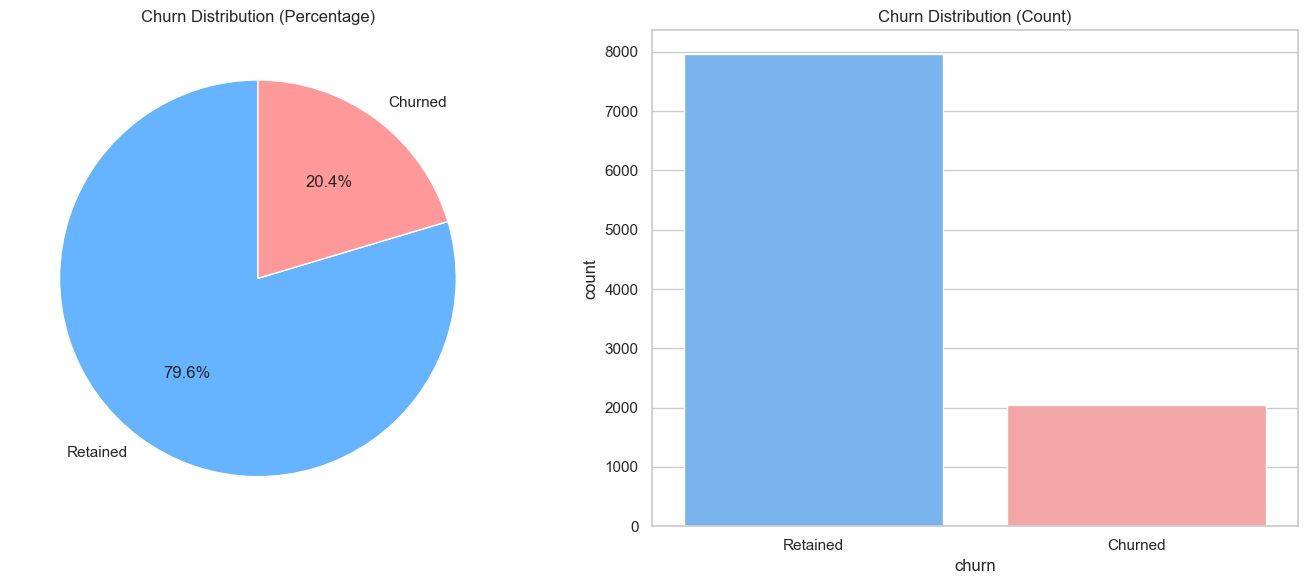

In [8]:
#data exploration
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# Pie Chart
fig1, ax = plt.subplots(1, 2, figsize=(14, 6))
churn_counts = df['churn'].value_counts()
ax[0].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
          startangle=90, colors=['#66b3ff','#ff9999'])
ax[0].set_title('Churn Distribution (Percentage)')

sns.countplot(x='churn', data=df, palette=['#66b3ff','#ff9999'], ax=ax[1])
ax[1].set_title('Churn Distribution (Count)')
ax[1].set_xticklabels(['Retained', 'Churned'])
plt.tight_layout()
plt.savefig('graph_churn_distribution.png')
plt.show()

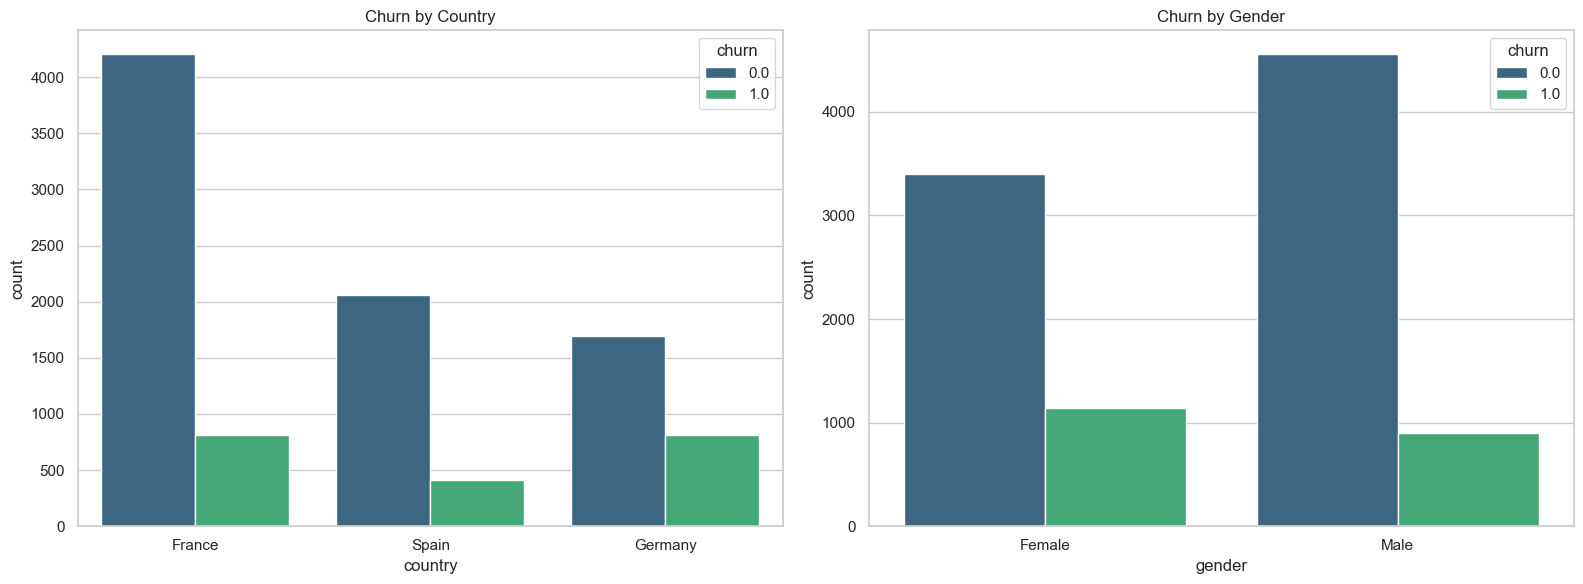

In [9]:
# --- Graph 2: Categorical Variables (Country & Gender) ---
fig2, ax = plt.subplots(1, 2, figsize=(16, 6))

# Country
sns.countplot(x='country', hue='churn', data=df, palette='viridis', ax=ax[0])
ax[0].set_title('Churn by Country')

# Gender
sns.countplot(x='gender', hue='churn', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Churn by Gender')
plt.tight_layout()
plt.savefig('graph_categorical_churn.png')
plt.show()

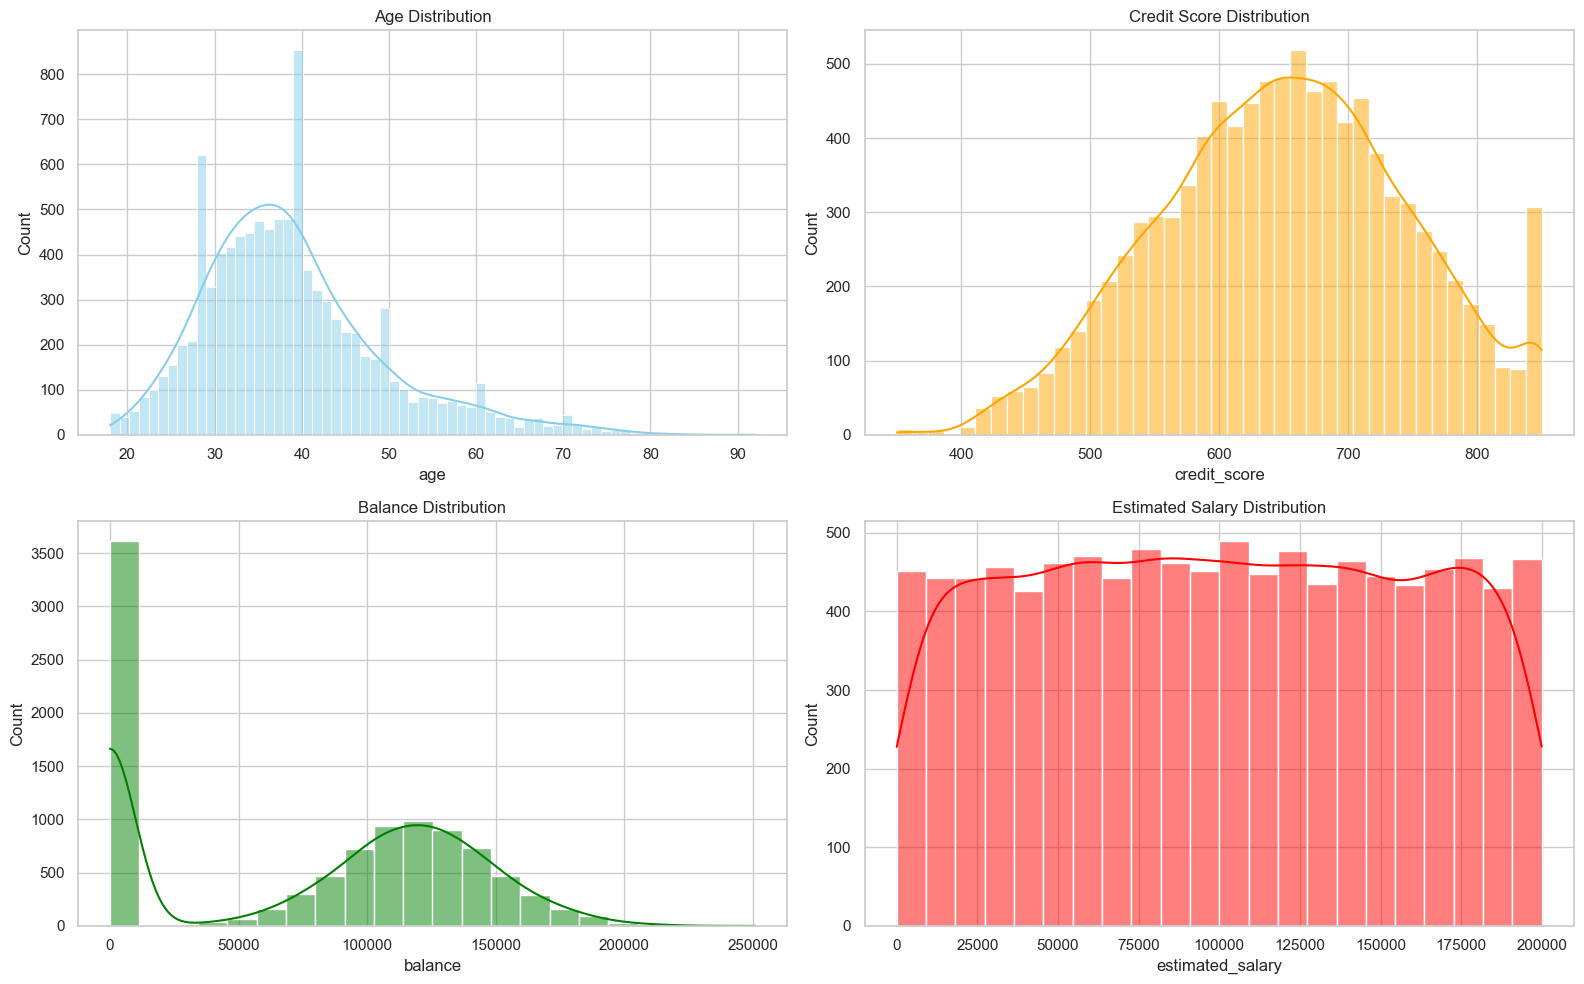

In [10]:
# --- Graph 3: Numerical Distributions (Histograms) ---
fig3, ax = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(df['age'], kde=True, color='skyblue', ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

sns.histplot(df['credit_score'], kde=True, color='orange', ax=ax[0, 1])
ax[0, 1].set_title('Credit Score Distribution')

sns.histplot(df['balance'], kde=True, color='green', ax=ax[1, 0])
ax[1, 0].set_title('Balance Distribution')

sns.histplot(df['estimated_salary'], kde=True, color='red', ax=ax[1, 1])
ax[1, 1].set_title('Estimated Salary Distribution')
plt.tight_layout()
plt.savefig('graph_numerical_distributions.png')
plt.show()

C:\Users\Surface Laptop 3\AppData\Local\Temp\ipykernel_8032\3635780873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='age', data=df, palette='Set2', ax=ax[0])
C:\Users\Surface Laptop 3\AppData\Local\Temp\ipykernel_8032\3635780873.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='balance', data=df, palette='Set2', ax=ax[1])
C:\Users\Surface Laptop 3\AppData\Local\Temp\ipykernel_8032\3635780873.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='credit_score', data=df, palette='Set2', ax=ax[2])

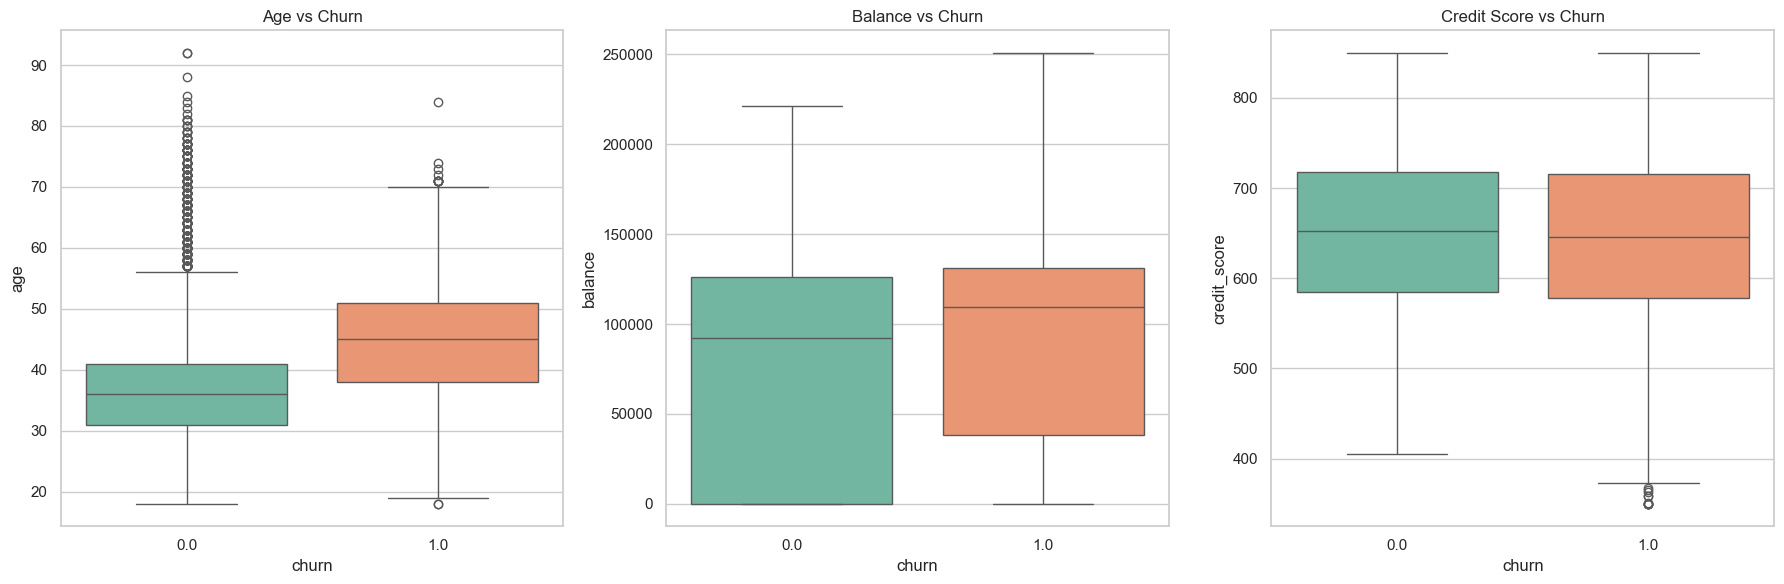

In [11]:
#remove outliers first
# --- Graph 4: Boxplots (Outliers & Relationships) ---
fig4, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='churn', y='age', data=df, palette='Set2', ax=ax[0])
ax[0].set_title('Age vs Churn')

sns.boxplot(x='churn', y='balance', data=df, palette='Set2', ax=ax[1])
ax[1].set_title('Balance vs Churn')

sns.boxplot(x='churn', y='credit_score', data=df, palette='Set2', ax=ax[2])
ax[2].set_title('Credit Score vs Churn')
plt.tight_layout()
plt.savefig('graph_boxplots.png')
plt.show()

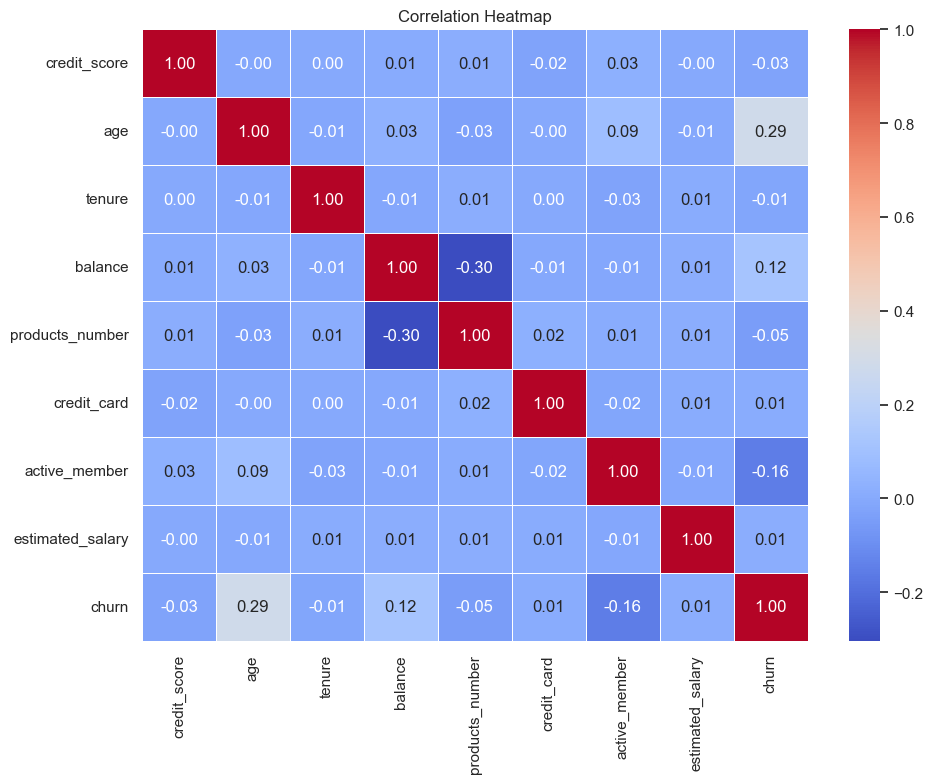

In [12]:
# --- Graph 5: Correlation Heatmap ---
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('graph_correlation_heatmap.png')
plt.show()

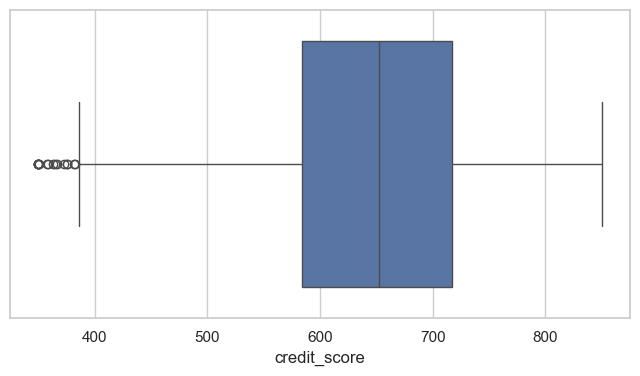

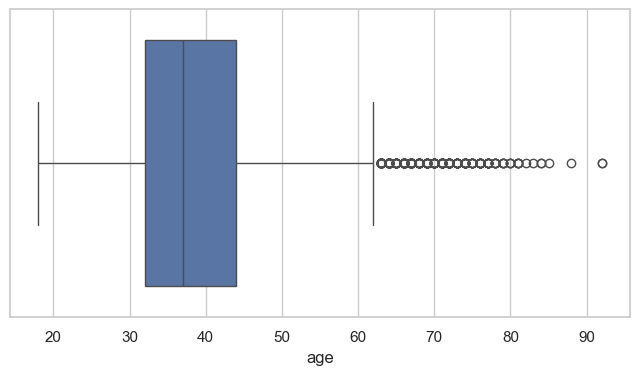

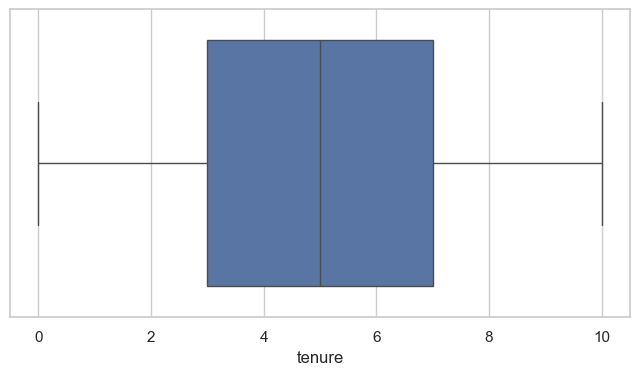

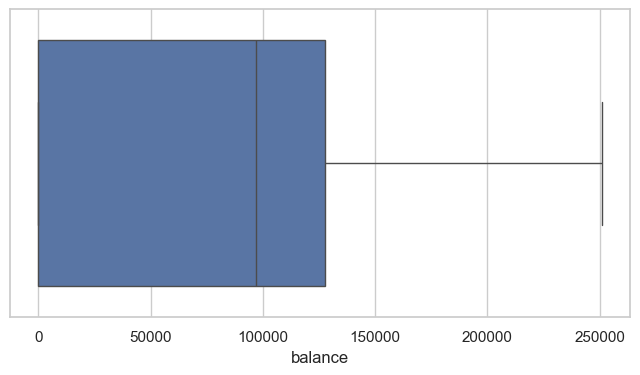

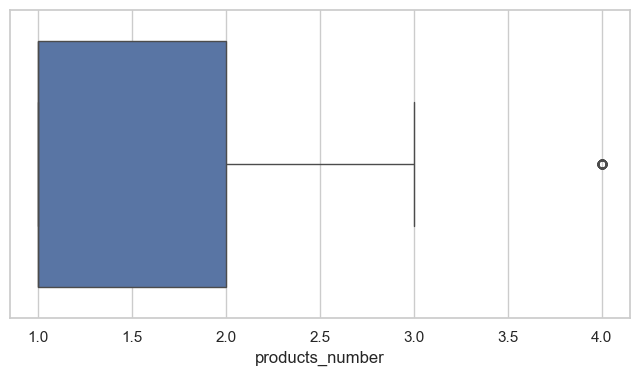

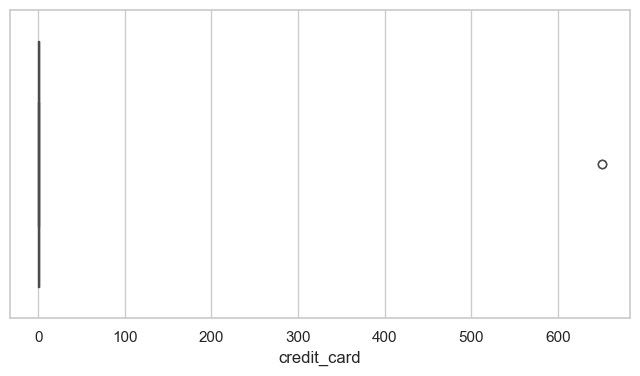

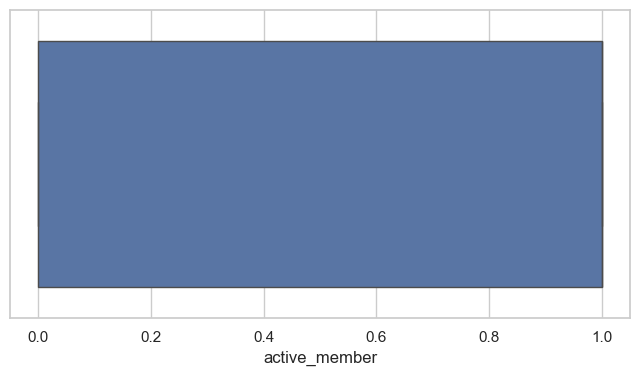

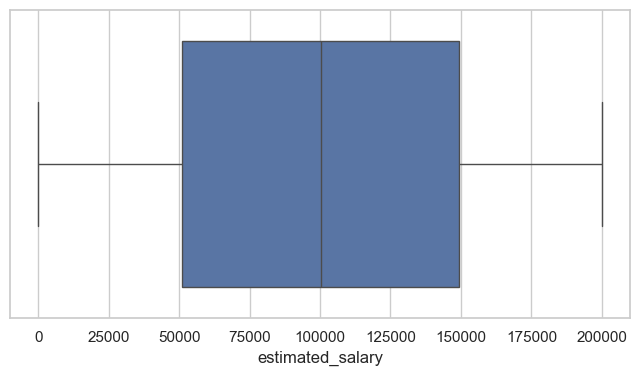

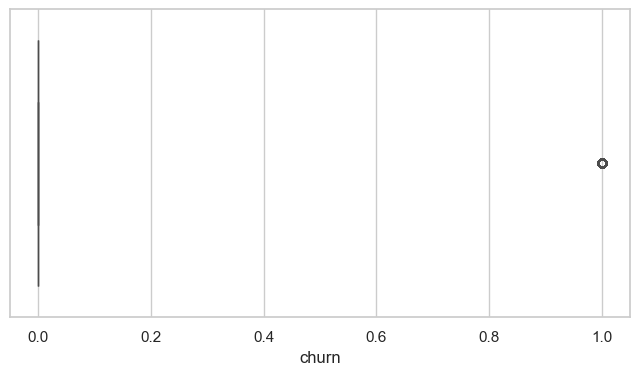

In [13]:
#outliers detection

for column in df.select_dtypes(include=('number')):
    plt.figure(figsize=(8,4))
    plt.tight_layout()
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=column, data=df)
    plt.show()

credit_score
False    9983
True       16
Name: count, dtype: int64


<Axes: xlabel='credit_score'>

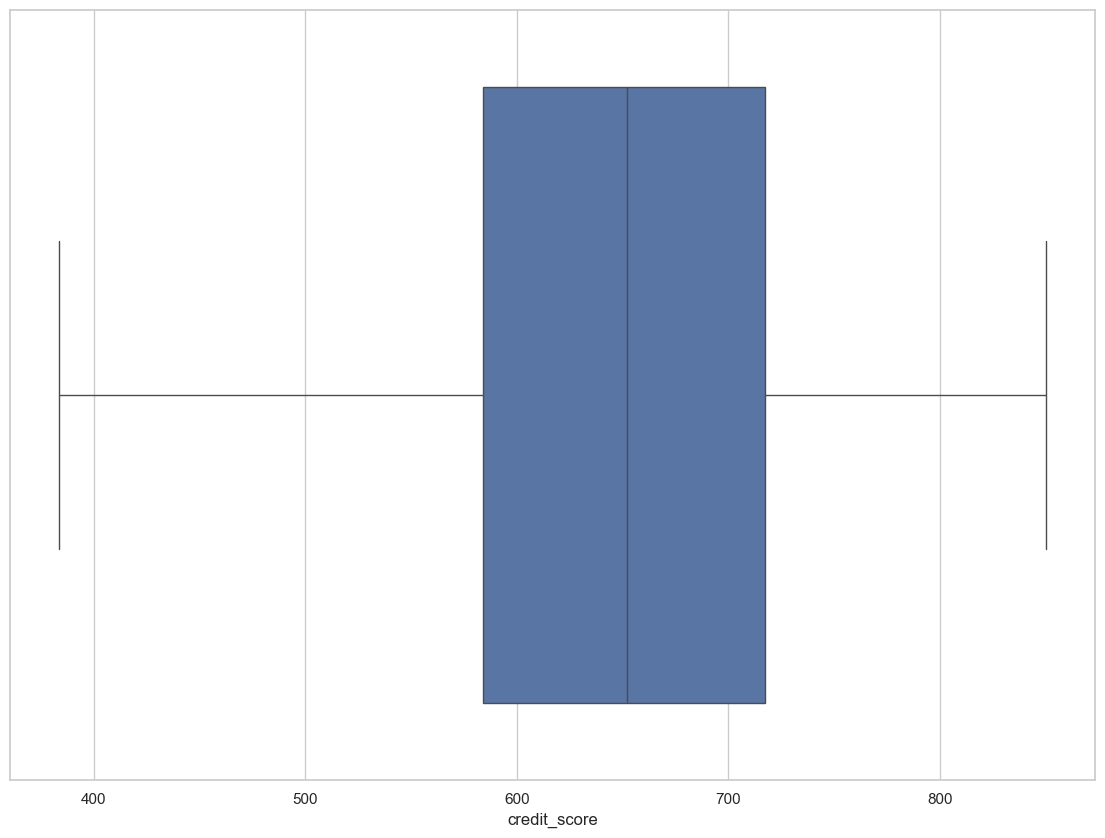

In [14]:
#outliers in credit_score and handling them
#IQR method Credit score
Q1 = df["credit_score"].quantile(0.25)
Q3 = df["credit_score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df['credit_score'] > upper_bound) | (df["credit_score"] < lower_bound)
print(outliers.value_counts())

#Feature Engineering
df["low_credit_score"] = 0
df.loc[df["credit_score"] < lower_bound, "low_credit_score"] = 1

df.loc[outliers, "credit_score"] = df["credit_score"].clip(lower_bound)
sns.boxplot(x=df['credit_score'])
#plt.show()

In [15]:
#age outliers
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (df['age'] > upper_bound) | (df["age"] < lower_bound)
print(outliers.value_counts())
df["is_Elderly"] = 0
df.loc[(df["age"] > upper_bound), "is_Elderly"] = 1
df.loc[outliers, "age"] = df["age"].clip(lower_bound, upper_bound)



age
False    9640
True      359
Name: count, dtype: int64


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly
58,511.0,Spain,Female,62.0,4.0,0.00,1.0,1.0,0.0,1643.11,1.0,0,1
85,652.0,Spain,Female,62.0,10.0,0.00,2.0,1.0,1.0,114675.75,0.0,0,1
104,670.0,France,Female,62.0,1.0,0.00,1.0,1.0,1.0,177655.68,1.0,0,1
158,646.0,France,Female,62.0,6.0,97259.25,1.0,0.0,1.0,104719.66,0.0,0,1
181,510.0,France,Male,62.0,2.0,0.00,2.0,1.0,1.0,48071.61,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,656.0,Germany,Male,62.0,7.0,153545.11,1.0,1.0,1.0,186574.68,0.0,0,1
9765,445.0,France,Male,62.0,2.0,136770.67,1.0,0.0,1.0,43678.06,0.0,0,1
9832,595.0,Germany,Female,62.0,2.0,105736.32,1.0,1.0,1.0,89935.73,1.0,0,1
9894,521.0,France,Female,62.0,6.0,0.00,2.0,1.0,1.0,49054.10,0.0,0,1


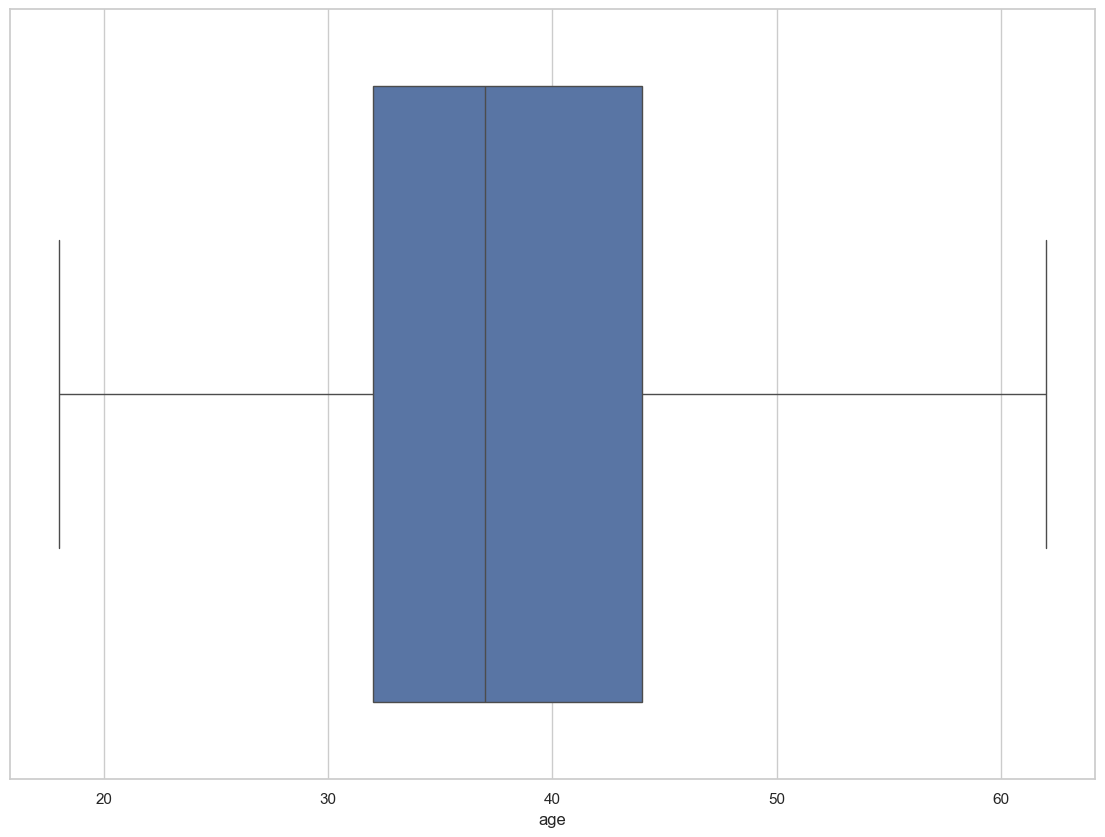

In [16]:
df['age'].describe()
sns.boxplot(x=df['age'])
#plt.show()
df.head(3)
df[df['is_Elderly'] == 1]

In [17]:


df["vip_customer"] = 0
df.loc[(df["balance"] > df["balance"].quantile(0.70)) & (df["credit_score"] > df["credit_score"].quantile(0.70)) & (df["active_member"] == 1) & (df["credit_card"] >= 1), "vip_customer"] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9999 non-null   float64
 1   country           9999 non-null   object 
 2   gender            9999 non-null   object 
 3   age               9999 non-null   float64
 4   tenure            9999 non-null   float64
 5   balance           9999 non-null   float64
 6   products_number   9999 non-null   float64
 7   credit_card       9999 non-null   float64
 8   active_member     9999 non-null   float64
 9   estimated_salary  9999 non-null   float64
 10  churn             9999 non-null   float64
 11  low_credit_score  9999 non-null   int64  
 12  is_Elderly        9999 non-null   int64  
 13  vip_customer      9999 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.4+ MB


In [18]:
#encoding categorical variables
df = pd.get_dummies(df,columns=['country'] ,prefix='country',dtype=int)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9999 non-null   float64
 1   gender            9999 non-null   object 
 2   age               9999 non-null   float64
 3   tenure            9999 non-null   float64
 4   balance           9999 non-null   float64
 5   products_number   9999 non-null   float64
 6   credit_card       9999 non-null   float64
 7   active_member     9999 non-null   float64
 8   estimated_salary  9999 non-null   float64
 9   churn             9999 non-null   float64
 10  low_credit_score  9999 non-null   int64  
 11  is_Elderly        9999 non-null   int64  
 12  vip_customer      9999 non-null   int64  
 13  country_France    9999 non-null   int64  
 14  country_Germany   9999 non-null   int64  
 15  country_Spain     9999 non-null   int64  
dtypes: float64(9), int64(6), object(1)
memory usage

In [19]:
df.head(5)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly,vip_customer,country_France,country_Germany,country_Spain
0,650.530212,Female,42.000000,2.000000,0.00,1.0,1.0,1.0,101348.88,1.0,0,0,0,1,0,0
1,608.000000,Female,41.000000,1.000000,83807.86,1.0,0.0,1.0,112542.58,0.0,0,0,0,1,0,0
2,502.000000,Male,42.000000,8.000000,159660.80,3.0,1.0,0.0,113931.57,1.0,0,0,0,1,0,0
3,699.000000,Female,38.922484,1.000000,0.00,2.0,0.0,0.0,93826.63,0.0,0,0,0,1,0,0
4,850.000000,Female,43.000000,5.013101,125510.82,1.0,1.0,1.0,79084.10,0.0,0,0,1,0,0,1


In [20]:
#gender
from sklearn.preprocessing import LabelEncoder
laben_encoder = LabelEncoder()
df["gender"] = laben_encoder.fit_transform(df["gender"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9999 non-null   float64
 1   gender            9999 non-null   int64  
 2   age               9999 non-null   float64
 3   tenure            9999 non-null   float64
 4   balance           9999 non-null   float64
 5   products_number   9999 non-null   float64
 6   credit_card       9999 non-null   float64
 7   active_member     9999 non-null   float64
 8   estimated_salary  9999 non-null   float64
 9   churn             9999 non-null   float64
 10  low_credit_score  9999 non-null   int64  
 11  is_Elderly        9999 non-null   int64  
 12  vip_customer      9999 non-null   int64  
 13  country_France    9999 non-null   int64  
 14  country_Germany   9999 non-null   int64  
 15  country_Spain     9999 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 1.5 MB


In [21]:
df.head(3)

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,low_credit_score,is_Elderly,vip_customer,country_France,country_Germany,country_Spain
0,650.530212,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0,0,0,1,0,0
1,608.000000,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0,0,0,1,0,0
2,502.000000,1,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0,0,0,1,0,0


In [22]:
# Feature engineering
df["IsActiveWithbalance"] = 0
df.loc[(df["active_member"]==1) & (df["balance"]>0), "IsActiveWithbalance"]=1

df["IsActiveWithoutbalance"] = 0
df.loc[(df["active_member"]==1) & (df["balance"]==0), "IsActiveWithoutbalance"]=1

df["InactiveWithoutbalance"] = 0
df.loc[(df["active_member"]==0) & (df["balance"]==0), "InactiveWithoutbalance"]=1

In [23]:
#saving new csv
df.to_csv('cleaned_data.csv', index=False)

Text(0.5, 1.0, 'Correlation Matrix')

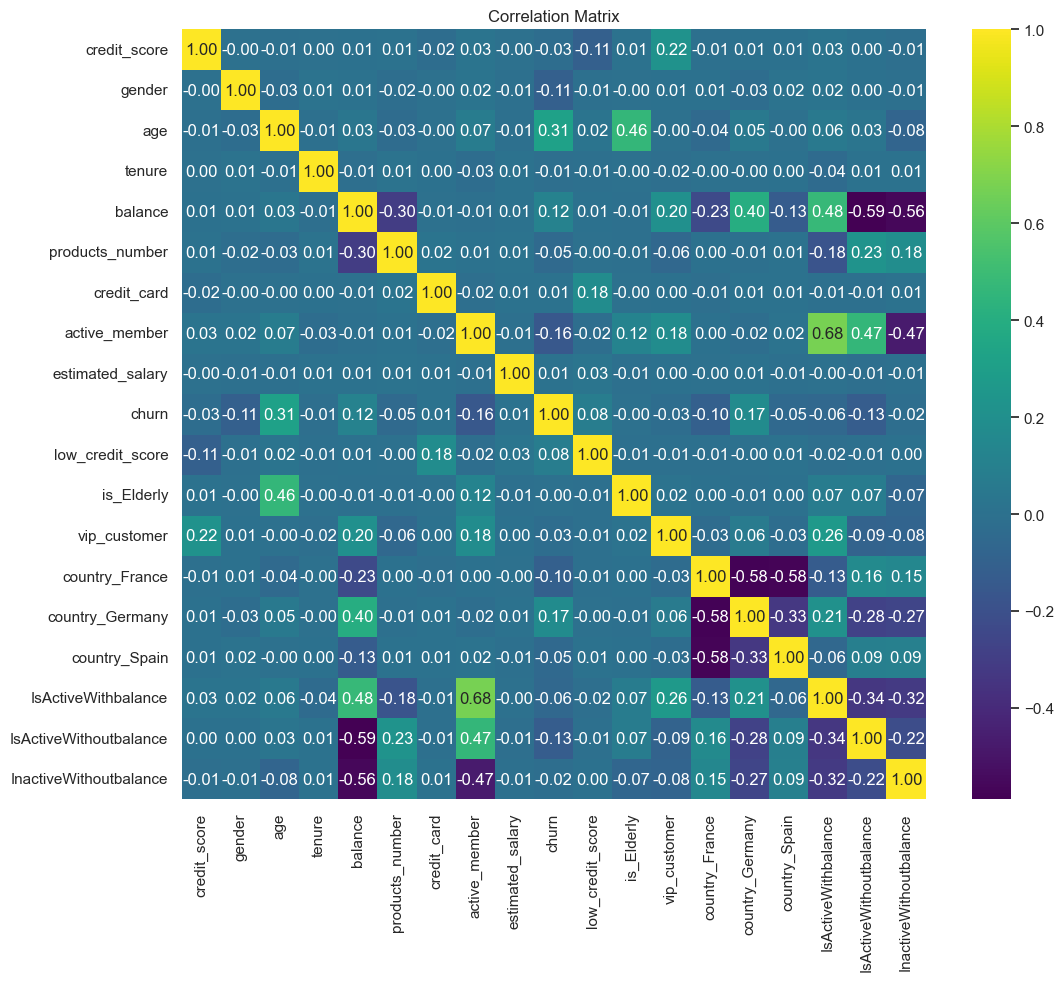

In [24]:

#correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = df.corr().select_dtypes(include=['number'])
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")
#plt.show()

In [25]:
#Feature Selection using Chi-Squared Test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df.drop(columns=["churn"],axis=1)
y = df["churn"]
X_scaled = scaler.fit_transform(x)
chi_scores = chi2(X_scaled,y)
print(chi_scores)


(array([5.23738736e-01, 5.08050784e+01, 1.01917502e+02, 3.31148856e-01,
       2.84451998e+01, 4.83206892e+00, 1.56666045e-01, 1.18281378e+02,
       2.43298594e-01, 6.25390280e+01, 3.15799711e-04, 7.61464089e+00,
       5.47379736e+01, 2.25764844e+02, 2.10918925e+01, 2.36892965e+01,
       1.33723100e+02, 4.30553230e+00]), array([4.69251187e-01, 1.02009435e-12, 5.78828518e-24, 5.64983382e-01,
       9.63884554e-08, 2.79350886e-02, 6.92244743e-01, 1.50456119e-27,
       6.21833782e-01, 2.61216519e-15, 9.85821736e-01, 5.78962875e-03,
       1.37719383e-13, 5.00030160e-51, 4.37776412e-06, 1.13210428e-06,
       6.28124045e-31, 3.79886051e-02]))


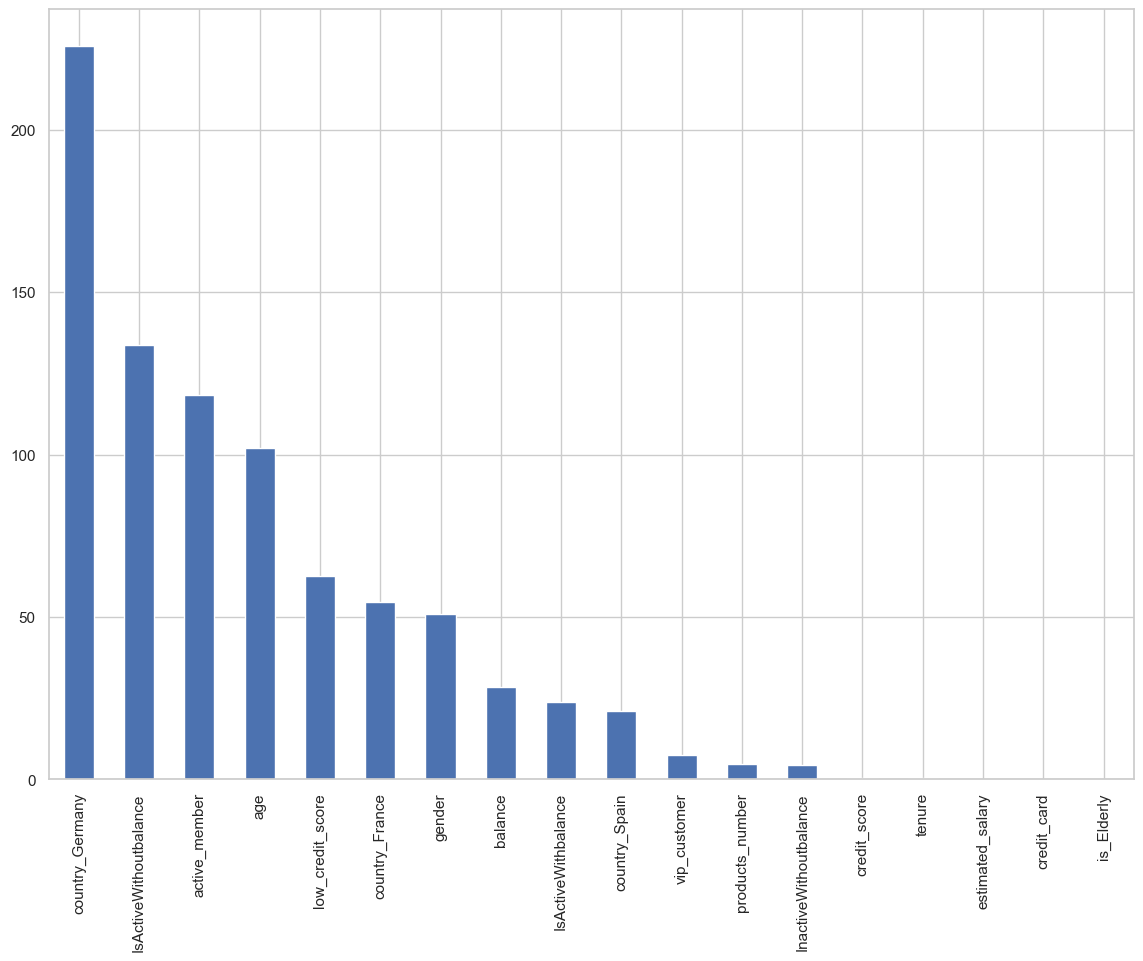

In [26]:
#the higher the more important
chi_values =pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

features = ['age', 'credit_score', 'estimated_salary', 'balance', 'products_number', 'active_member', 'IsActiveWithbalance', 'IsActiveWithoutbalance', 'low_credit_score', 'is_Elderly', 'vip_customer', 'country_France', 'country_Germany', 'country_Spain', 'gender','InactiveWithoutbalance']


X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tree = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      1593
         1.0       0.85      0.30      0.45       407

    accuracy                           0.85      2000
   macro avg       0.85      0.64      0.68      2000
weighted avg       0.85      0.85      0.82      2000



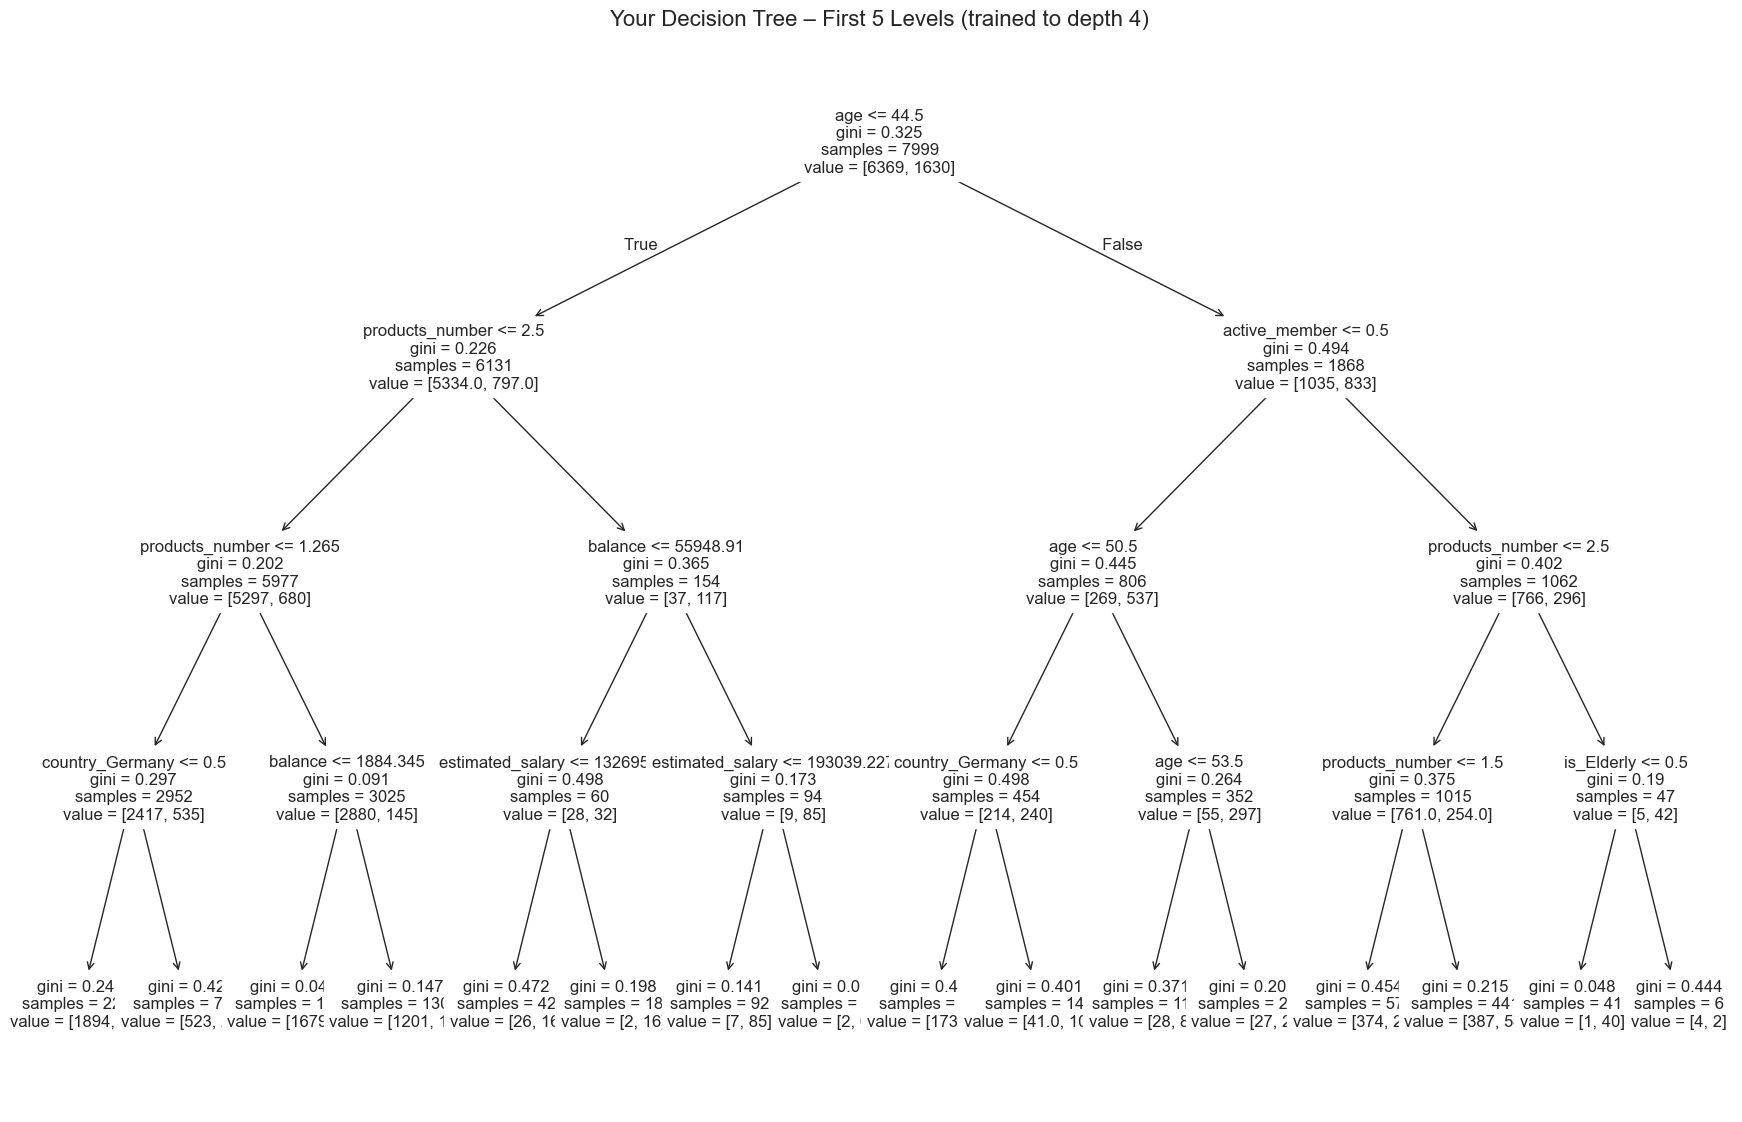

In [30]:
from sklearn.tree import plot_tree


plt.figure(figsize=(22, 14))
plot_tree(
    tree,
    fontsize=12,
    feature_names=X.columns,
    max_depth=4   # ← show only top 4 levels so it fits nicely
)
plt.title("Your Decision Tree – First 5 Levels (trained to depth 4)", fontsize=16)
plt.show()

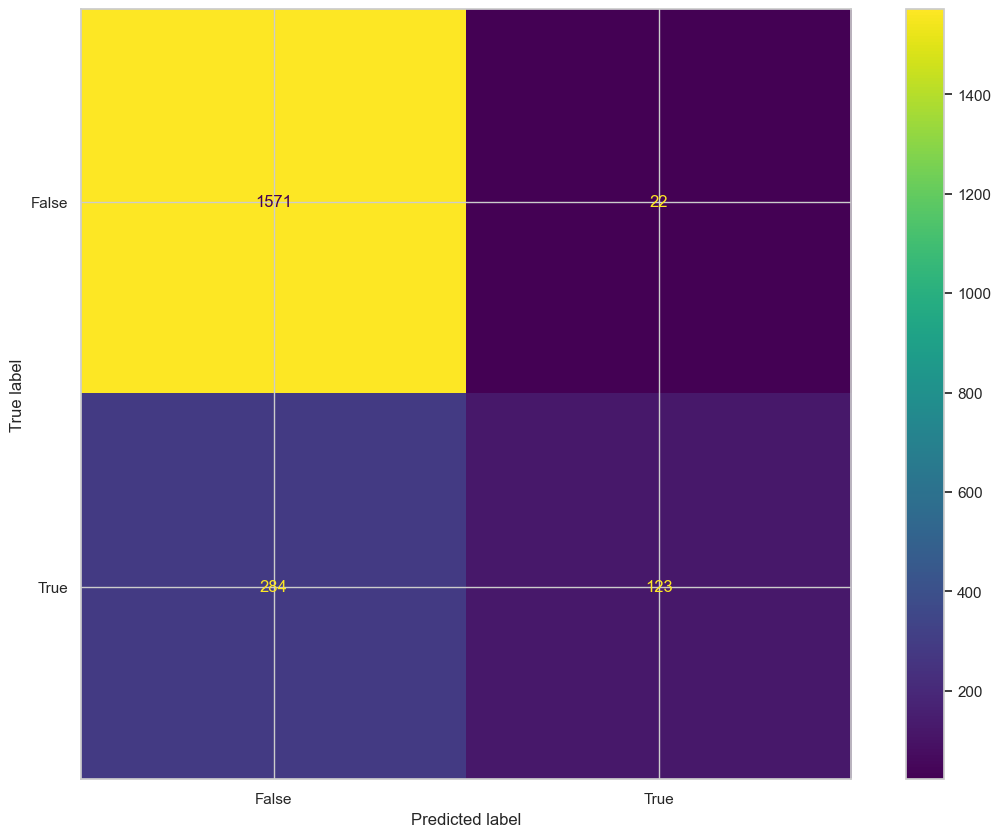

In [31]:
from sklearn import metrics
import numpy as np

actual = y_test
predicted = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mtx, display_labels = [False, True])
cm_display.plot()



In [32]:
#Naive Bayes Classifier   Not recommended for this dataset dueto dependent features
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop('churn',axis=1)
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

clf = GaussianNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1608
         1.0       0.00      0.00      0.00       392

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



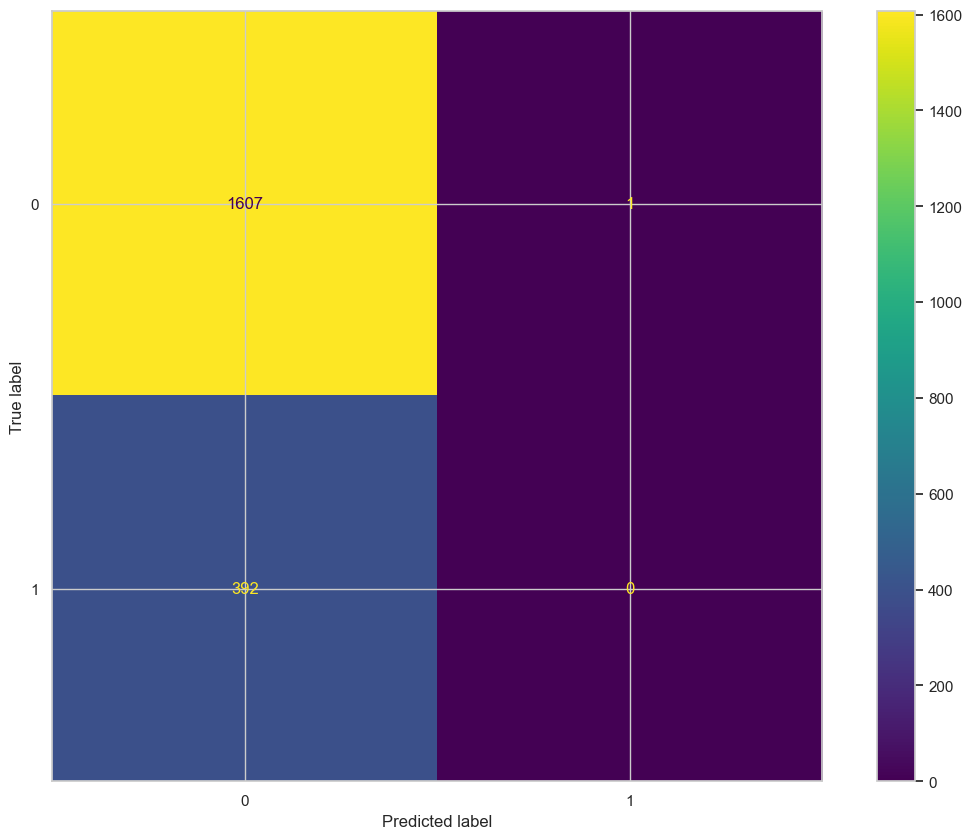

In [33]:
actual = y_test
predicted = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mtx)
cm_display.plot()
plt.show()

In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Lr = LogisticRegression(max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)
Lr.fit(X_train,y_train)
y_pred = Lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90      1608
         1.0       0.60      0.25      0.35       392

    accuracy                           0.82      2000
   macro avg       0.72      0.60      0.62      2000
weighted avg       0.79      0.82      0.79      2000



C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


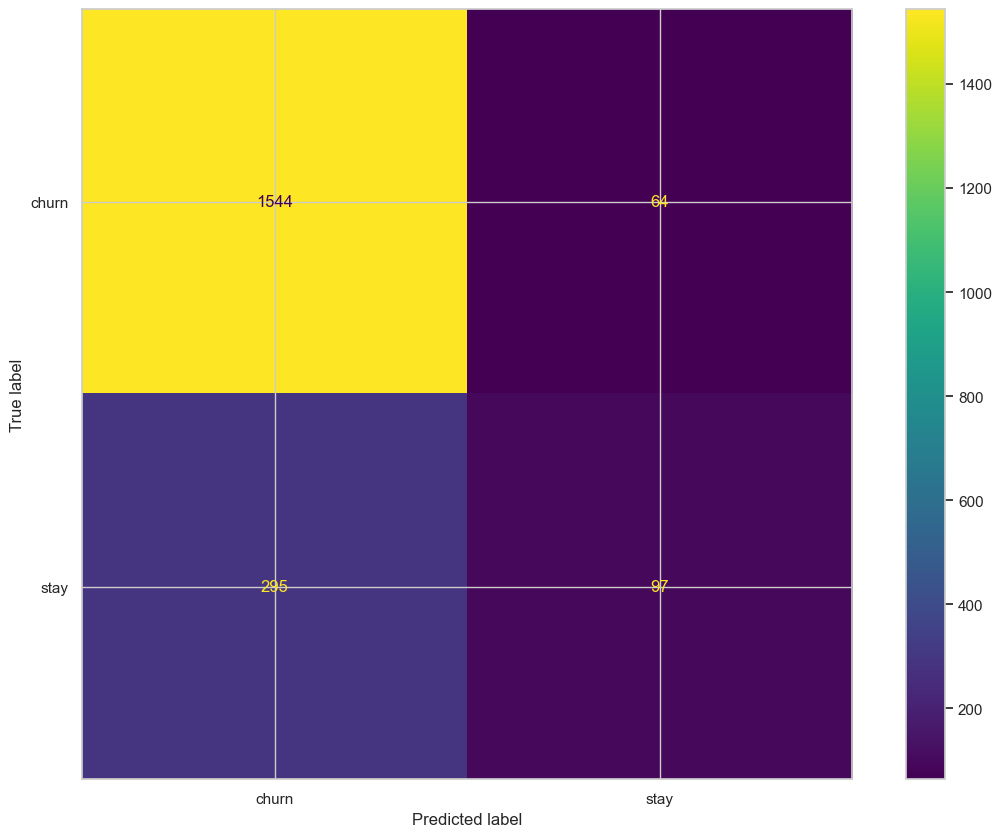

In [35]:
#matrix confusion for logistic regression
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['churn', 'stay'])
cm_display.plot()
plt.show()

In [36]:
#CNN Model  "Neural Netork"
